Collect the data and see how they look. There are three sources of data, so I deal with tehm seperately and combine togather at the end.

In [1]:
import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(['seaborn-colorblind', 'seaborn-talk'])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Merge WRA water level
There are three kinds of data format in these WRA water level data. I'll check them one by one and merged into a dataset or write script to run it every time.

## Before 2019
In the folders naming 201901XXX.

### Pilot steps

In [ ]:
glob.glob('data/*/*_自記站時水位.csv')

['data\\201901225\\201901225_自記站時水位.csv',
 'data\\201901226\\201901226_自記站時水位.csv',
 'data\\201901228\\201901228_自記站時水位.csv',
 'data\\201901229\\201901229_自記站時水位.csv',
 'data\\201901505\\201901505_自記站時水位.csv',
 'data\\201901506\\201901506_自記站時水位.csv',
 'data\\201901507\\201901507_自記站時水位.csv',
 'data\\201901508\\201901508_自記站時水位.csv',
 'data\\201901509\\201901509_自記站時水位.csv']

In [74]:
dtype = np.hstack([[str, str, str, int], [float for _ in range(24)]])

X = pd.read_csv('data/201901225/201901225_自記站時水位.csv', encoding='big5', 
        dtype={'管理單位': str, '井名': str, '井號': str, '觀測日期': str}
        )
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892158 entries, 0 to 892157
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   管理單位    892158 non-null  object
 1   井名      892158 non-null  object
 2   井號      892158 non-null  object
 3   觀測日期    892158 non-null  object
 4   0時(m)   892089 non-null  object
 5   1時(m)   892087 non-null  object
 6   2時(m)   892087 non-null  object
 7   3時(m)   892087 non-null  object
 8   4時(m)   892085 non-null  object
 9   5時(m)   892084 non-null  object
 10  6時(m)   892085 non-null  object
 11  7時(m)   892085 non-null  object
 12  8時(m)   892085 non-null  object
 13  9時(m)   892084 non-null  object
 14  10時(m)  892067 non-null  object
 15  11時(m)  892078 non-null  object
 16  12時(m)  892078 non-null  object
 17  13時(m)  892083 non-null  object
 18  14時(m)  892085 non-null  object
 19  15時(m)  892078 non-null  object
 20  16時(m)  892077 non-null  object
 21  17時(m)  892075 non-null  object
 

Clearly, there are NAs. Meanwhile, the data types can all be specified to object initially because they all become objects after importing.

#### Melt the data to align timestamp
Modify the hours, melt (unpivot) the data and build a column for timestamp.

In [73]:
cols = np.hstack([['管理單位', '井名', '井號', '觀測日期'], ['{}:00:00'.format(hr) for hr in range(24)]])
X.columns = cols

In [8]:
X.head()

,管理單位,井名,井號,觀測日期,0:00:00,1:00:00,2:00:00,3:00:00,4:00:00,5:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,管理單位,井名,井號,觀測日期,0時(m),1時(m),2時(m),3時(m),4時(m),5時(m),...,14時(m),15時(m),16時(m),17時(m),18時(m),19時(m),20時(m),21時(m),22時(m),23時(m)
1,第四河川局,國聖(1),07010111,2007/1/1 上午 12:00:00,16.88,16.88,16.88,16.88,16.88,16.88,...,16.89,16.89,16.88,16.88,16.87,16.88,16.88,16.88,16.88,16.88
2,第四河川局,國聖(1),07010111,2007/1/2 上午 12:00:00,16.88,16.88,16.88,16.88,16.88,16.88,...,16.88,16.87,16.87,16.86,16.86,16.86,16.86,16.86,16.86,16.86
3,第四河川局,國聖(1),07010111,2007/1/3 上午 12:00:00,16.86,16.86,16.87,16.86,16.86,16.86,...,16.85,16.84,16.85,16.84,16.84,16.84,16.84,16.84,16.84,16.84
4,第四河川局,國聖(1),07010111,2007/1/4 上午 12:00:00,16.84,16.84,16.84,16.84,16.85,16.85,...,16.84,16.83,16.83,16.82,16.82,16.82,16.82,16.82,16.82,16.82


In [25]:
# exclude 管理單位 since it's not necessary
# WL_m is 水位(m)
test = pd.melt(X[:100], id_vars=X.columns[1:4], value_vars=X.columns[4:], value_name='WL_m', var_name='Time')
test

,井名,井號,觀測日期,Time,WL_m
0,國聖(1),07010111,2007/1/1 上午 12:00:00,0:00:00,16.88
1,國聖(1),07010111,2007/1/2 上午 12:00:00,0:00:00,16.88
2,國聖(1),07010111,2007/1/3 上午 12:00:00,0:00:00,16.86
3,國聖(1),07010111,2007/1/4 上午 12:00:00,0:00:00,16.84
4,國聖(1),07010111,2007/1/5 上午 12:00:00,0:00:00,16.82
...,...,...,...,...,...
2395,國聖(1),07010111,2007/4/6 上午 12:00:00,23:00:00,17.35
2396,國聖(1),07010111,2007/4/7 上午 12:00:00,23:00:00,17.32
2397,國聖(1),07010111,2007/4/8 上午 12:00:00,23:00:00,17.31
2398,國聖(1),07010111,2007/4/9 上午 12:00:00,23:00:00,17.24


In [26]:
pd.to_datetime(test.iloc[0, 2].split()[0] + ' ' + test.iloc[0, 3])

Timestamp('2007-01-01 00:00:00')

In [62]:
test['Datetime'] = pd.to_datetime(['{} {}'.format(
    _[1]['觀測日期'].split()[0], 
    _[1]['Time']
    ) for _ in test.iterrows()])

out = test.drop(['觀測日期', 'Time'], axis=1)
out

,井名,井號,WL_m,Datetime
0,國聖(1),07010111,16.88,2007-01-01 00:00:00
1,國聖(1),07010111,16.88,2007-01-02 00:00:00
2,國聖(1),07010111,16.86,2007-01-03 00:00:00
3,國聖(1),07010111,16.84,2007-01-04 00:00:00
4,國聖(1),07010111,16.82,2007-01-05 00:00:00
...,...,...,...,...
2395,國聖(1),07010111,17.35,2007-04-06 23:00:00
2396,國聖(1),07010111,17.32,2007-04-07 23:00:00
2397,國聖(1),07010111,17.31,2007-04-08 23:00:00
2398,國聖(1),07010111,17.24,2007-04-09 23:00:00


#### Cut off the tail of 井名

In [65]:
out['井名'][0]

'國聖(1)             '

In [68]:
out['井名'] = [_.split()[0] for _ in out['井名']]
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   井名        2400 non-null   object        
 1   井號        2400 non-null   object        
 2   WL_m      2400 non-null   object        
 3   Datetime  2400 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 75.1+ KB


#### Check the format
Just to make sure these csv files having the same naming logic have the sma format.

In [77]:
cols = np.hstack([['管理單位', '井名', '井號', '觀測日期'], ['{}:00:00'.format(hr) for hr in range(24)]])

check_df = pd.DataFrame()
for csv in glob.glob('data/*/*_自記站時水位.csv'):
        X = pd.read_csv(csv, encoding='big5', 
                dtype=object
                )[:2]
        check_df = pd.concat([check_df, X], axis=0, join='outer')
check_df

,管理單位,井名,井號,觀測日期,0時(m),1時(m),2時(m),3時(m),4時(m),5時(m),...,14時(m),15時(m),16時(m),17時(m),18時(m),19時(m),20時(m),21時(m),22時(m),23時(m)
0,第四河川局,國聖(1),07010111,2007/1/1 上午 12:00:00,16.88,16.88,16.88,16.88,16.88,16.88,...,16.89,16.89,16.88,16.88,16.87,16.88,16.88,16.88,16.88,16.88
1,第四河川局,國聖(1),07010111,2007/1/2 上午 12:00:00,16.88,16.88,16.88,16.88,16.88,16.88,...,16.88,16.87,16.87,16.86,16.86,16.86,16.86,16.86,16.86,16.86
0,第三河川局,華龍(1),06030111,2007/1/1 上午 12:00:00,缺測,缺測,缺測,缺測,缺測,缺測,...,缺測,缺測,缺測,缺測,缺測,缺測,缺測,缺測,缺測,缺測
1,第三河川局,華龍(1),06030111,2007/1/2 上午 12:00:00,缺測,缺測,缺測,缺測,缺測,缺測,...,缺測,缺測,缺測,缺測,缺測,缺測,缺測,缺測,缺測,缺測
0,第五河川局,大崙(1),10010111,2007/1/1 上午 12:00:00,5.63,5.64,5.64,5.66,5.66,5.67,...,5.70,5.70,5.71,5.72,5.73,5.72,5.71,5.71,5.70,5.70
1,第五河川局,大崙(1),10010111,2007/1/2 上午 12:00:00,5.70,5.70,5.70,5.70,5.69,5.69,...,5.67,5.67,5.67,5.67,5.66,5.67,5.68,5.68,5.69,5.69
0,第七河川局,中正(1),12010111,2007/1/1 上午 12:00:00,7.88,7.92,7.93,7.94,7.95,7.95,...,7.90,7.88,7.86,7.89,7.88,7.88,7.89,7.88,7.89,7.93
1,第七河川局,中正(1),12010111,2007/1/2 上午 12:00:00,7.94,7.96,7.95,7.98,8.00,8.01,...,7.87,7.84,7.85,7.87,7.86,7.84,7.87,7.87,7.89,7.90
0,第十河川局,十工處(1),01010211,2007/1/1 上午 12:00:00,2.84,2.84,2.84,2.84,2.84,2.84,...,2.84,2.84,2.84,2.84,2.84,2.84,2.84,2.84,2.84,2.84
1,第十河川局,十工處(1),01010211,2007/1/2 上午 12:00:00,2.84,2.84,2.84,2.84,2.84,2.84,...,2.84,2.84,2.84,2.84,2.84,2.84,2.84,2.84,2.84,2.84


The formats are the same. But I found '缺測' in the dataset which indicates the NAs not only represented by null values. 

### Build the sub-dataset
Collect the csv in this format/time range to build a sub-dataset by applying those pilot steps.

In [79]:
cols = np.hstack([['管理單位', '井名', '井號', '觀測日期'], ['{}:00:00'.format(hr) for hr in range(24)]])

compile_df = pd.DataFrame()
for csv in glob.glob('data/*/*_自記站時水位.csv'):
        X = pd.read_csv(csv, encoding='big5', 
                dtype=object
                )
        # change hr names
        X.columns = cols

        # melt the data, excluding '管理單位'
        X = pd.melt(X, id_vars=X.columns[1:4], value_vars=X.columns[4:], value_name='水位(m)', var_name='Time')
        
        # build timestamp
        X['Datetime'] = pd.to_datetime([
                '{} {}'.format(row['觀測日期'].split()[0], row['Time']) for _, row in X.iterrows()])
        X = X.drop(['觀測日期', 'Time'], axis=1)
        
        # cut off the space tail of 井名
        X['井名'] = [_.split()[0] for _ in X['井名']]

        # append the data to the compile
        compile_df = pd.concat([compile_df, X], axis=0, join='outer')

compile_df.info()

KeyboardInterrupt: 

It takes more than 10 mins so I quit to use the below approach, which might be faster but comsume more RAM while excecuting.

In [83]:
cols = np.hstack([['管理單位', '井名', '井號', '觀測日期'], ['{}:00:00'.format(hr) for hr in range(24)]])

X = pd.DataFrame()
for csv in glob.glob('data/*/*_自記站時水位.csv'):
        X = pd.concat(
                [X, pd.read_csv(csv, encoding='big5', dtype=object)], 
                axis=0, join='outer')
        print(csv)

# change hr names
X.columns = cols

# melt the data, excluding '管理單位'
X = pd.melt(X, id_vars=X.columns[1:4], value_vars=X.columns[4:], value_name='水位(m)', var_name='Time')

# build timestamp
X['Datetime'] = pd.to_datetime([
        '{} {}'.format(row['觀測日期'].split()[0], row['Time']) for _, row in X.iterrows()])
X = X.drop(['觀測日期', 'Time'], axis=1)

# cut off the space tail of 井名
X['井名'] = [_.split()[0] for _ in X['井名']]

X.to_csv('data/database_wl_before2019_{}.csv',format(date))
X.info()

data\201901225\201901225_自記站時水位.csv
data\201901226\201901226_自記站時水位.csv
data\201901228\201901228_自記站時水位.csv
data\201901229\201901229_自記站時水位.csv
data\201901505\201901505_自記站時水位.csv
data\201901506\201901506_自記站時水位.csv
data\201901507\201901507_自記站時水位.csv
data\201901508\201901508_自記站時水位.csv
data\201901509\201901509_自記站時水位.csv


MemoryError: Unable to allocate 613. MiB for an array with shape (80412096,) and data type object

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80412096 entries, 0 to 80412095
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   井名        object        
 1   井號        object        
 2   水位(m)     object        
 3   Datetime  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 2.4+ GB


In [91]:
[_.split()[0] for _ in X['井名']]

MemoryError: 

In [93]:
X = X.drop('井名', axis=1)

In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80412096 entries, 0 to 80412095
Data columns (total 3 columns):
 #   Column    Dtype         
---  ------    -----         
 0   井號        object        
 1   水位(m)     object        
 2   Datetime  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.8+ GB


In [101]:
for col in X.columns[1:]:
    X[col].to_csv('data/database_wl_before2019_{}_{}.csv',format(col, date))

TypeError: "delimiter" must be a 1-character string

Well...the calculating time of the second approach is also very long and exceed the computer's RAM limit. Many issues pop up relating the over-used RAM. I should take the first approach and clean cache in each loop.

In [ ]:
cols = np.hstack([['管理單位', '井名', '井號', '觀測日期'], ['{}:00:00'.format(hr) for hr in range(24)]])

for index, csv in enumerate(glob.glob('data/*/*_自記站時水位.csv')):
        X = pd.read_csv(csv, encoding='big5', 
                dtype=object
                )
        # change hr names
        X.columns = cols

        # melt the data, excluding '管理單位'
        X = pd.melt(X, id_vars=X.columns[1:4], value_vars=X.columns[4:], value_name='水位(m)', var_name='Time')
        
        # build timestamp
        X['Datetime'] = pd.to_datetime([
                '{} {}'.format(row['觀測日期'].split()[0], row['Time']) for _, row in X.iterrows()])
        X = X.drop(['觀測日期', 'Time'], axis=1)
        
        # cut off the space tail of 井名
        X['井名'] = [_.split()[0] for _ in X['井名']]

        # Export data in each loop to avoid running out RAM
        X.to_csv('data/database_wl_before2019_{}_{}.csv'.format(index, date))
        print('{} is finished. {:.1f}%'.format(csv, (index+1)/9*100))


In [3]:
X = pd.read_csv(csv, encoding='big5', 
        dtype=object
        )
# change hr names
X.columns = cols

# melt the data, excluding '管理單位'
X = pd.melt(X, id_vars=X.columns[1:4], value_vars=X.columns[4:], value_name='水位(m)', var_name='Time')

In [5]:
# build timestamp
X['Datetime'] = pd.to_datetime([
        '{} {}'.format(row['觀測日期'].split()[0], row['Time']) for _, row in X.iterrows()])

It needs about 20 mins to generate.

In [6]:
X = X.drop(['觀測日期', 'Time'], axis=1)

# cut off the space tail of 井名
X['井名'] = [_.split()[0] for _ in X['井名']]

# Export data in each loop to avoid running out RAM
X.to_csv('data/database_wl_before2019_{}_{}.csv'.format(index, date), index=False)

In [11]:
X.to_csv('data/database_wl_before2019_{}_{}.csv'.format(index, date), index=False)

In [10]:
X.tail()

,井名,井號,水位(m),Datetime
21411787,重寮,101111M3,-3.11,2017-12-16 23:00:00
21411788,重寮,101111M3,-3.09,2017-12-17 23:00:00
21411789,重寮,101111M3,-3.08,2017-12-18 23:00:00
21411790,重寮,101111M3,-3.11,2017-12-19 23:00:00
21411791,重寮,101111M3,-3.11,2017-12-20 23:00:00


### Multiprocess by Dask

In [2]:
from dask import delayed
from dask.distributed import Client
client = Client(n_workers=4, 
                threads_per_worker=1,
                memory_limit='25GB')

In [14]:
client.close()

distributed.nanny - WARNING - Worker process still alive after 4 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 4 seconds, killing


In [3]:
def read_csv(csv):
    return pd.read_csv(csv, encoding='big5', dtype=object)

def process(df):
    # change hr names
    df.columns = np.hstack([['管理單位', '井名', '井號', '觀測日期'], ['{}:00:00'.format(hr) for hr in range(24)]])

    # melt the data, excluding '管理單位'
    X = pd.melt(df, id_vars=df.columns[1:4], value_vars=df.columns[4:], value_name='水位(m)', var_name='Time')

    # build timestamp
    X['Datetime'] = pd.to_datetime([
            '{} {}'.format(row['觀測日期'].split()[0], row['Time']) for _, row in X.iterrows()])
    X = X.drop(['觀測日期', 'Time'], axis=1)

    # cut off the space tail of 井名
    X['井名'] = [_.split()[0] for _ in X['井名']]

    return X

def concat(compile_list):
    return pd.concat(compile_list, axis=0, join='outer')

compile_list = []
for csv in glob.glob('data/*/*_自記站時水位.csv'):
        df = delayed(read_csv)(csv)
        X = delayed(process)(df)
        compile_list.append(X)
        
total = delayed(concat)(compile_list)


In [4]:
type(total)

dask.delayed.Delayed

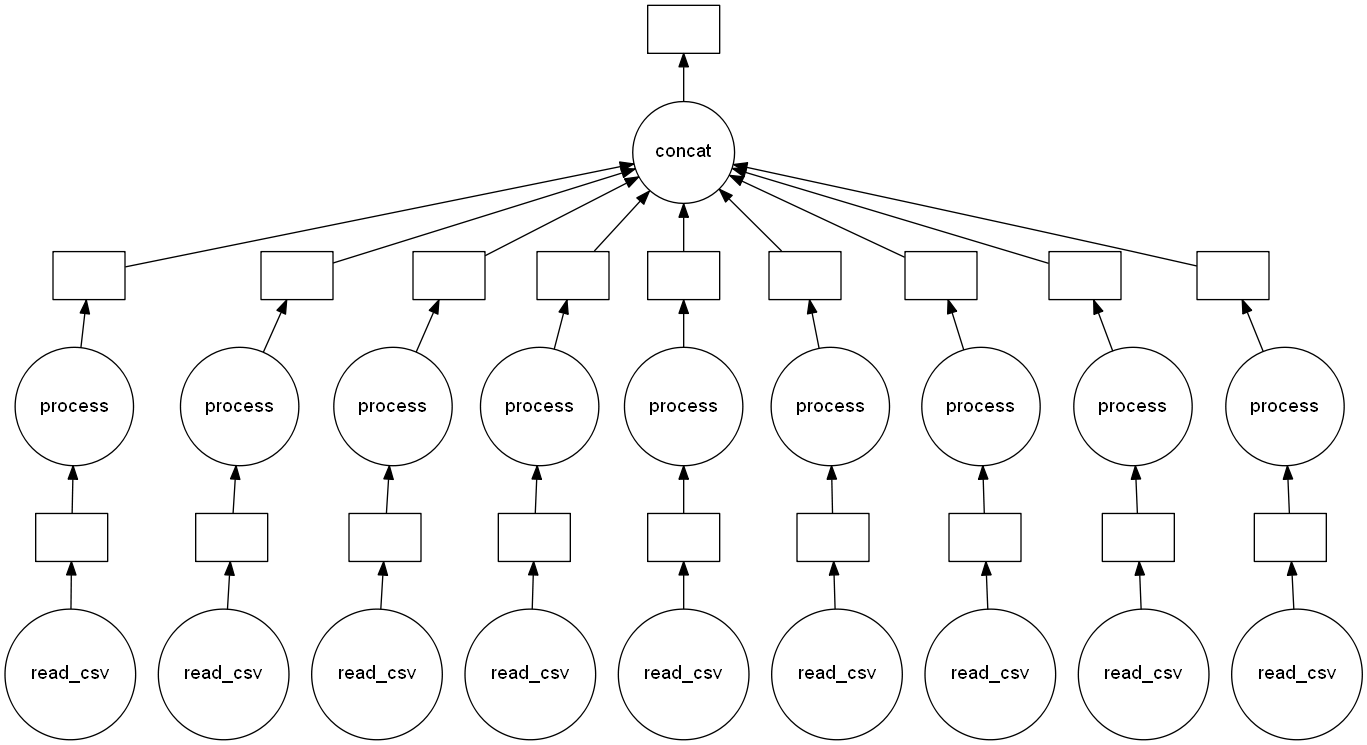

In [5]:
total.visualize()

In [6]:
compile_df = total.compute()

In [7]:
compile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80412096 entries, 0 to 4997039
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   井名        object        
 1   井號        object        
 2   水位(m)     object        
 3   Datetime  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ GB


In [9]:
compile_df.to_csv('data/database_wl_before2019_{}.csv'.format(date), index=False)

In [2]:
client.close()

## 2019
In the folders naming 1, 2, 3...The csv is by each station.

In [5]:
X = pd.read_csv('data/1/二龍觀一(02050311)_20210405205125.csv', encoding='big5', skiprows=2)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52559 entries, 0 to 52558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期時間    52559 non-null  object 
 1   地下水位    52559 non-null  float64
dtypes: float64(1), object(1)
memory usage: 821.4+ KB


In [6]:
X.head()

,日期時間,地下水位
0,2019-01-01 00:00:00,0.938
1,2019-01-01 00:10:00,0.944
2,2019-01-01 00:20:00,0.946
3,2019-01-01 00:30:00,0.951
4,2019-01-01 00:40:00,0.955


## 2020-2021
The csv files naming GW_202XXX.

In [3]:
X = pd.read_csv('data/GW_20202.csv', encoding='big5')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199244 entries, 0 to 3199243
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   管理單位      object 
 1   地下水分區     object 
 2   井號        int64  
 3   井名        object 
 4   井頂高程(m)   float64
 5   觀測時間      object 
 6   地下水位高(m)  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 170.9+ MB


In [4]:
X.head()

,管理單位,地下水分區,井號,井名,井頂高程(m),觀測時間,地下水位高(m)
0,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-02-01 00:00,-1.357
1,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-02-01 00:10,-1.358
2,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-02-01 00:20,-1.358
3,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-02-01 00:30,-1.357
4,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-02-01 00:40,-1.359


# 2020-2021
Downloaded 及時地下水 from https://gweb.wra.gov.tw/Hydroinfo/downloadpage/#.

In [11]:
data2021 = pd.DataFrame()

for csv in glob.glob('data/*.csv'):
    X = pd.read_csv(csv, encoding='big5')
    data2021 = pd.concat([data2021, X], join='outer', axis=0)
    print(len(X))

data2021.reset_index(drop=True, inplace=True)
data2021

8482
23336
21913
22822
7308
17261
14267
82493
17334
32285
59439
24536
8021
10134
12248
31120
110734
9923


,管理單位,氣象局站號,水利署站號,站名,觀測時間,測站高程,雨量值(mm)
0,台北水源特定區,001AE0,1140P164,大林橋,2020-01-01 00:20,181.9,0.5
1,台北水源特定區,001AE0,1140P164,大林橋,2020-01-01 04:50,181.9,0.5
2,台北水源特定區,001AE0,1140P164,大林橋,2020-01-02 02:46,181.9,0.5
3,台北水源特定區,001AE0,1140P164,大林橋,2020-01-05 11:01,181.9,0.5
4,台北水源特定區,001AE0,1140P164,大林橋,2020-01-12 12:24,181.9,0.5
...,...,...,...,...,...,...,...
513651,台北水源特定區,wr1601,1140P168,金瓜寮溪橋,2021-07-06 01:18,184.6,0.5
513652,台北水源特定區,wr1601,1140P168,金瓜寮溪橋,2021-07-06 02:10,184.6,0.5
513653,台北水源特定區,wr1601,1140P168,金瓜寮溪橋,2021-07-06 03:07,184.6,0.5
513654,台北水源特定區,wr1601,1140P168,金瓜寮溪橋,2021-07-06 03:30,184.6,0.5


In [12]:
data_df = pd.read_csv('data\\GW_20201.csv', encoding='big5')
data_df

,管理單位,地下水分區,井號,井名,井頂高程(m),觀測時間,地下水位高(m)
0,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-01-01 00:00,-1.670
1,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-01-01 00:10,-1.672
2,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-01-01 00:20,-1.673
3,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-01-01 00:30,-1.675
4,第十河川局,臺北盆地,1010212,十工處(1),10.435,2020-01-01 00:40,-1.676
...,...,...,...,...,...,...,...
3419412,第六河川局,嘉南平原,64110231,港和(3),5.459,2020-01-31 23:10,4.095
3419413,第六河川局,嘉南平原,64110231,港和(3),5.459,2020-01-31 23:20,4.094
3419414,第六河川局,嘉南平原,64110231,港和(3),5.459,2020-01-31 23:30,4.094
3419415,第六河川局,嘉南平原,64110231,港和(3),5.459,2020-01-31 23:40,4.094


# Before 2019

In [23]:
glob.glob('data/2019*/*_自記站時水位.csv')

['data\\201901225\\201901225_自記站時水位.csv',
 'data\\201901226\\201901226_自記站時水位.csv',
 'data\\201901228\\201901228_自記站時水位.csv',
 'data\\201901229\\201901229_自記站時水位.csv',
 'data\\201901505\\201901505_自記站時水位.csv',
 'data\\201901506\\201901506_自記站時水位.csv',
 'data\\201901507\\201901507_自記站時水位.csv',
 'data\\201901508\\201901508_自記站時水位.csv',
 'data\\201901509\\201901509_自記站時水位.csv']

In [70]:
X = pd.read_csv('data\\201901225\\201901225_自記站時水位.csv', encoding='big5', 
        usecols=range(4), dtype={'管理單位': str, '井名': str, '井號': str, '觀測日期': str}, 
        parse_dates=['觀測日期'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892158 entries, 0 to 892157
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   管理單位    892158 non-null  object
 1   井名      892158 non-null  object
 2   井號      892158 non-null  object
 3   觀測日期    892158 non-null  object
dtypes: object(4)
memory usage: 27.2+ MB


In [71]:
X.dtypes

管理單位    object
井名      object
井號      object
觀測日期    object
dtype: object

In [31]:
pd.read_csv('data\\201901225\\201901225_自記站時水位.csv', encoding='big5' , dtype={'井號': str, '觀測日期': str})

,管理單位,井名,井號,觀測日期,0時(m),1時(m),2時(m),3時(m),4時(m),5時(m),...,14時(m),15時(m),16時(m),17時(m),18時(m),19時(m),20時(m),21時(m),22時(m),23時(m)
0,第四河川局,國聖(1),07010111,2007/1/1 上午 12:00:00,16.88,16.88,16.88,16.88,16.88,16.88,...,16.89,16.89,16.88,16.88,16.87,16.88,16.88,16.88,16.88,16.88
1,第四河川局,國聖(1),07010111,2007/1/2 上午 12:00:00,16.88,16.88,16.88,16.88,16.88,16.88,...,16.88,16.87,16.87,16.86,16.86,16.86,16.86,16.86,16.86,16.86
2,第四河川局,國聖(1),07010111,2007/1/3 上午 12:00:00,16.86,16.86,16.87,16.86,16.86,16.86,...,16.85,16.84,16.85,16.84,16.84,16.84,16.84,16.84,16.84,16.84
3,第四河川局,國聖(1),07010111,2007/1/4 上午 12:00:00,16.84,16.84,16.84,16.84,16.85,16.85,...,16.84,16.83,16.83,16.82,16.82,16.82,16.82,16.82,16.82,16.82
4,第四河川局,國聖(1),07010111,2007/1/5 上午 12:00:00,16.82,16.83,16.83,16.83,16.83,16.83,...,16.82,16.82,16.81,16.81,16.81,16.81,16.81,16.81,16.81,16.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892153,第五河川局,重寮,101111M3,2017/12/16 上午 12:00:00,-3.12,-3.13,-3.13,-3.13,-3.14,-3.13,...,-3.12,-3.12,-3.12,-3.11,-3.11,-3.12,-3.12,-3.12,-3.11,-3.11
892154,第五河川局,重寮,101111M3,2017/12/17 上午 12:00:00,-3.11,-3.11,-3.11,-3.11,-3.11,-3.10,...,-3.09,-3.09,-3.09,-3.09,-3.09,-3.09,-3.09,-3.09,-3.09,-3.09
892155,第五河川局,重寮,101111M3,2017/12/18 上午 12:00:00,-3.09,-3.09,-3.08,-3.08,-3.08,-3.08,...,-3.08,-3.07,-3.08,-3.08,-3.08,-3.08,-3.08,-3.08,-3.08,-3.08
892156,第五河川局,重寮,101111M3,2017/12/19 上午 12:00:00,-3.08,-3.08,-3.08,-3.08,-3.08,-3.08,...,-3.07,-3.07,-3.07,-3.08,-3.08,-3.08,-3.10,-3.10,-3.11,-3.11


In [34]:
test = pd.read_csv('data\\201901225\\201901225_自記站時水位.csv', encoding='big5' , dtype={'井號': str, '觀測日期': str}).iloc[:5, :8]
test

,管理單位,井名,井號,觀測日期,0時(m),1時(m),2時(m),3時(m)
0,第四河川局,國聖(1),07010111,2007/1/1 上午 12:00:00,16.88,16.88,16.88,16.88
1,第四河川局,國聖(1),07010111,2007/1/2 上午 12:00:00,16.88,16.88,16.88,16.88
2,第四河川局,國聖(1),07010111,2007/1/3 上午 12:00:00,16.86,16.86,16.87,16.86
3,第四河川局,國聖(1),07010111,2007/1/4 上午 12:00:00,16.84,16.84,16.84,16.84
4,第四河川局,國聖(1),07010111,2007/1/5 上午 12:00:00,16.82,16.83,16.83,16.83


In [40]:
test['觀測日期'] = [date[:-12] for date in test['觀測日期']]

In [39]:
test['id'] = ['']

['2007/1/1', '2007/1/2', '2007/1/3', '2007/1/4', '2007/1/5']

In [35]:
pd.melt(test, value_vars=test.columns[-4:])

,variable,value
0,0時(m),16.88
1,0時(m),16.88
2,0時(m),16.86
3,0時(m),16.84
4,0時(m),16.82
5,1時(m),16.88
6,1時(m),16.88
7,1時(m),16.86
8,1時(m),16.84
9,1時(m),16.83


# 2019

In [15]:
pd.read_csv('data\\1\\三星觀一(02100211)_20210405205334.csv', encoding='big5', skiprows=2)

,日期時間,地下水位
0,2019-01-01 00:00:00,66.743
1,2019-01-01 00:10:00,66.743
2,2019-01-01 00:20:00,66.744
3,2019-01-01 00:30:00,66.744
4,2019-01-01 00:40:00,66.743
...,...,...
52554,2019-12-31 23:10:00,65.592
52555,2019-12-31 23:20:00,65.592
52556,2019-12-31 23:30:00,65.593
52557,2019-12-31 23:40:00,65.592
